## Portfolio rate of return

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wd
import matplotlib.pyplot as plt

In [36]:
tickers = ['PG', 'F', 'MSFT', 'GE']
portfolio_data = pd.DataFrame()

import datetime
import yfinance as yf

yf.pdr_override()

start = datetime.datetime(1995, 1, 1).date()
end = datetime.datetime(2017,1,1).date()

for t in tickers:
    portfolio_data[t] = wd.get_data_yahoo(t, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [37]:
portfolio_data.info()
#cheecking good data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5540 entries, 1995-01-03 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      5540 non-null   float64
 1   F       5540 non-null   float64
 2   MSFT    5540 non-null   float64
 3   GE      5540 non-null   float64
dtypes: float64(4)
memory usage: 216.4 KB


In [38]:
portfolio_data.head()

,PG,F,MSFT,GE
Date,,,,
1995-01-03,7.674553,3.921362,2.341811,25.512766
1995-01-04,7.613032,4.026869,2.358833,25.512766
1995-01-05,7.505378,3.991699,2.319924,25.575308
1995-01-06,7.520755,3.991699,2.358833,25.450241
1995-01-09,7.489991,4.062039,2.344242,25.200115


In [39]:
portfolio_data.tail()

,PG,F,MSFT,GE
Date,,,,
2016-12-23,70.560158,9.086881,57.981033,176.844238
2016-12-27,70.261185,9.035830,58.017715,176.955185
2016-12-28,69.821022,8.933730,57.751827,175.845749
2016-12-29,70.053543,8.919144,57.669312,175.901215
2016-12-30,69.829323,8.846214,56.972507,175.291016


### normalize data to 100 
### (P[t]/p[0])*100

In [40]:
denom = portfolio_data.iloc[0]
denom

PG       7.674553
F        3.921362
MSFT     2.341811
GE      25.512766
Name: 1995-01-03 00:00:00, dtype: float64

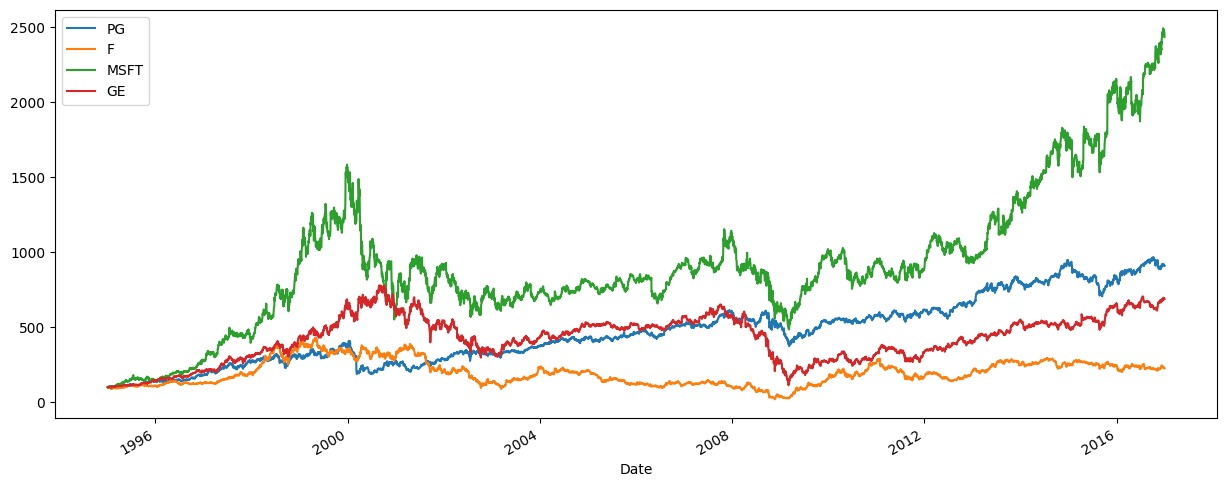

In [41]:
(portfolio_data / denom *100).plot(figsize=(15,6))
plt.show()
#gives a good landmark for starting point

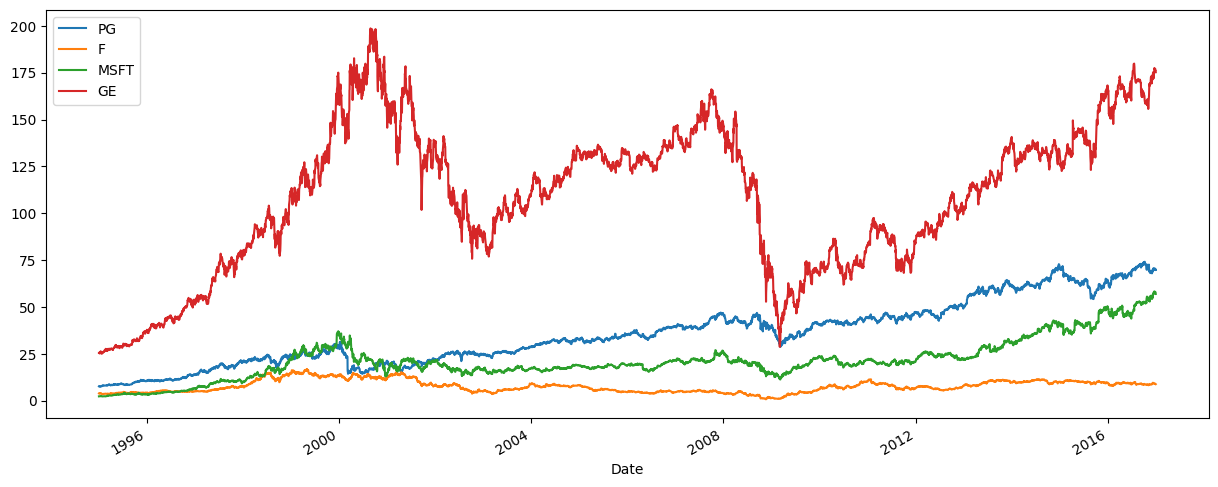

In [44]:
portfolio_data.plot(figsize=(15,6))
plt.show()
#no good landmark to compare NOT GOOD!

In [43]:
portfolio_data.loc['1995-01-03']

PG       7.674553
F        3.921362
MSFT     2.341811
GE      25.512766
Name: 1995-01-03 00:00:00, dtype: float64

In [45]:
portfolio_data.iloc[0]
# same in diffrent syntax

PG       7.674553
F        3.921362
MSFT     2.341811
GE      25.512766
Name: 1995-01-03 00:00:00, dtype: float64

### MSFT fair winner

## Calculating the return of a portfolio of securities

In [46]:
returns = (portfolio_data / portfolio_data.shift(1)) - 1
returns.head()

,PG,F,MSFT,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.026906,0.007269,0.000000
1995-01-05,-0.014141,-0.008734,-0.016495,0.002451
1995-01-06,0.002049,0.000000,0.016772,-0.004890
1995-01-09,-0.004091,0.017622,-0.006186,-0.009828


In [47]:
weights = [0.25, 0.25, 0.25, 0.25] # must sum up to 1

In [48]:
np.dot(returns, weights)
#we get array due to dot product

array([        nan,  0.0065395 , -0.00922952, ..., -0.00710416,
        0.00014603, -0.00673229])

In [49]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.125860
F       0.119508
MSFT    0.195586
GE      0.130304
dtype: float64

In [50]:
np.dot(annual_returns, weights)

0.14281443691715498

In [51]:
portfolio_1 = str(round(np.dot(annual_returns, weights), 5)*100) + ' %'
print(portfolio_1)
#printing portfolio rate of return

14.280999999999999 %


In [52]:
weights_2 = np.array([0.4,0.4,0.15,0.05])
#new weights for portfolio

In [54]:
portfolio_2 = str(round(np.dot(annual_returns, weights_2), 5)*100) + ' %'
print(portfolio_1)
print(portfolio_2)

14.280999999999999 %
13.4 %


## Market index's
### helps tell how the overall market is doing

S&P 500,
DOWJONES,
NASDAQ,
ect...